In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Motivation for Numerical Root Finding Techniques

Given some function $f\left(x\right)$, its *roots* are solutions to the equation $f\left(x\right) = 0$. In some sense, every equation you've ever solved has been a *root-finding* exercise. Indeed, the solutions to the equation $x^2 + 8x + 10 = 5x + 7$ are the roots of the polynomial $p\left(x\right) = x^2 + 3x + 3$. Even non-polynomial equations have solutions which can be mapped to roots of functions. For example, the solutions to $\displaystyle{\frac{x^2 - 9}{x + 4}e^x = 10\sin\left(x\right)}$ are roots of the function $f\left(x\right) = \frac{x^2 - 9}{x + 4}e^x - 10\sin\left(x\right)$.

In the case of the function $f\left(x\right)$ above, there is no way to *algebraically* determine the roots of this function. We need to *approximate* the root instead -- numerical techniques are excellent options for this.

In this section of our course, we'll explore several methods which are useful in rootfinding. We'll begin with *incremental search* (useful for bracketing an interval where a root can be found), and then look at *bisection* and *linear interpolation* methods for closing in on the location of the root. For now, it will be useful to build some intuition for what we are doing. As usual, we'll build that intuition through some visuals.

## When Do Roots Exist?

As a first step, we need a method to determine whether a root exists on an interval. A simple method for this is to evaluate a function at the endpoints of the interval and to look for a sign-change.

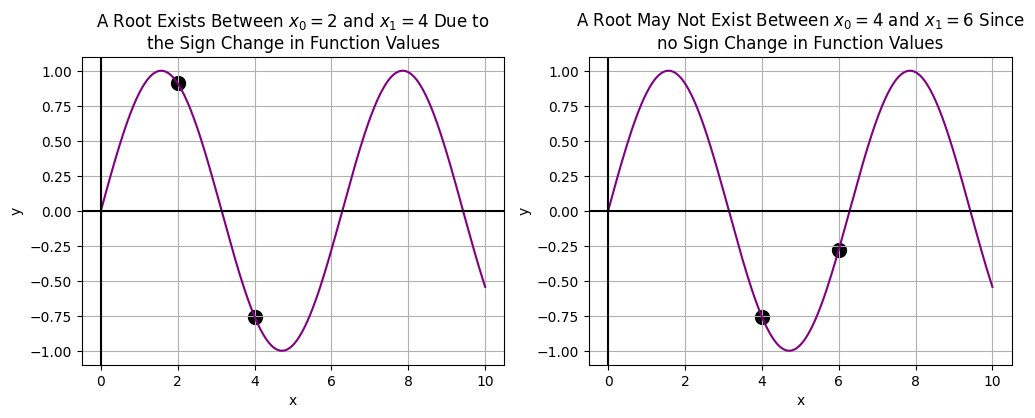

In [ ]:
#@title
x_vals = np.linspace(0, 10, 250)
y_vals = np.sin(x_vals)

x0a = 2
y0a = np.sin(x0a)
x1a = 4
y1a = np.sin(x1a)

x0b = 4
y0b = np.sin(x0b)
x1b = 6
y1b = np.sin(x1b)

plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.plot(x_vals, y_vals, color = "purple")
plt.scatter([x0a, x1a], [y0a, y1a], color = "black", s = 100)
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("A Root Exists Between $x_0 = 2$ and $x_1 = 4$ Due to \nthe Sign Change in Function Values")

plt.subplot(1,2,2)
plt.plot(x_vals, y_vals, color = "purple")
plt.scatter([x0b, x1b], [y0b, y1b], color = "black", s = 100)
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("A Root May Not Exist Between $x_0 = 4$ and $x_1 = 6$ Since \nno Sign Change in Function Values")
plt.show()

Perhaps you've already noticed that there are potential problems with this technique though. For example, if there is a sign change in function values along $\left[x_1, x_2\right]$, there may be a single root, multiple roots, or even no root at all! See the scenarios and plots below for examples.

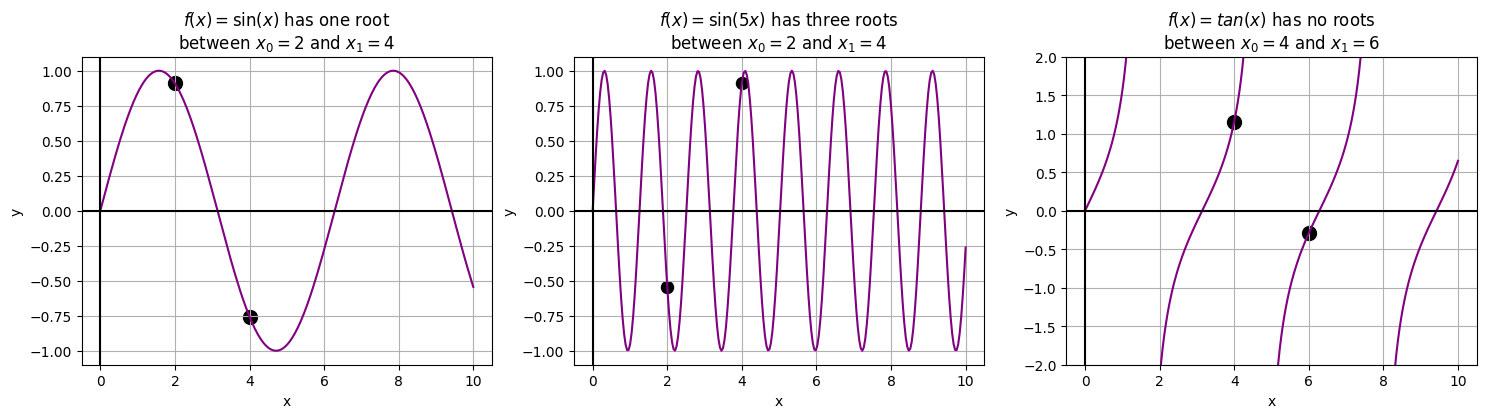

In [ ]:
#@title
x_vals = np.linspace(0, 10, 250)
y1_vals = np.sin(x_vals)
y2_vals = np.sin(5*x_vals)
y3_vals = np.tan(x_vals)

plt.figure(figsize = (18, 4))
x0 = 2
y0 = np.sin(x0)
x1 = 4
y1 = np.sin(x1)
plt.subplot(1, 3, 1)
plt.plot(x_vals, y1_vals, color = "purple")
plt.scatter([x0, x1], [y0, y1], color = "black", s = 100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x) = \sin(x)$ has one root \nbetween $x_0 = 2$ and $x_1 = 4$")
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")

x0 = 2
y0 = np.sin(5*x0)
x1 = 4
y1 = np.sin(5*x1)
plt.subplot(1, 3, 2)
plt.plot(x_vals, y2_vals, color = "purple")
plt.scatter([x0, x1], [y0, y1], color = "black", s = 75)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x) = \sin(5x)$ has three roots \nbetween $x_0 = 2$ and $x_1 = 4$")
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")

x0 = 4
y0 = np.tan(x0)
x1 = 6
y1 = np.tan(x1)
plt.subplot(1, 3, 3)
plt.plot(x_vals[:30], y3_vals[:30], color = "purple")
plt.plot(x_vals[50:110], y3_vals[50:110], color = "purple")
plt.plot(x_vals[120:190], y3_vals[120:190], color = "purple")
plt.plot(x_vals[200:250], y3_vals[200:250], color = "purple")
plt.scatter([x0, x1], [y0, y1], color = "black", s = 100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x) = tan(x)$ has no roots \nbetween $x_0 = 4$ and $x_1 = 6$")
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.ylim((-2, 2))

plt.show()

The challenges aren't just in whether an interval with a sign change leads to a single root, multiple roots, or no roots. An interval without a sign change (at the endpoints) could also include a root.

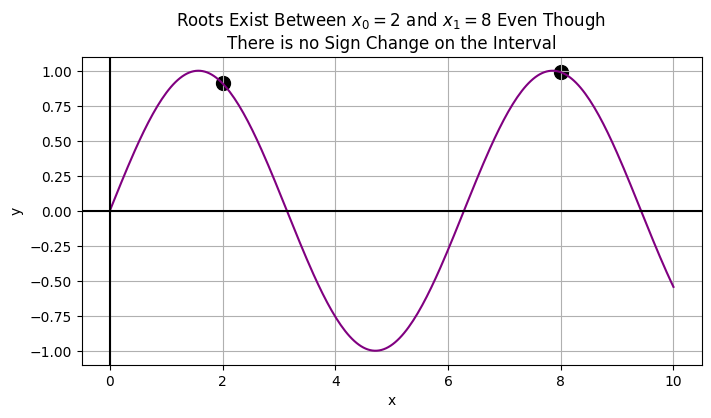

In [ ]:
#@title
x0 = 2
y0 = np.sin(x0)
x1 = 8
y1 = np.sin(x1)
plt.figure(figsize = (8, 4))
plt.plot(x_vals, y1_vals, color = "purple")
plt.scatter([x0, x1], [y0, y1], color = "black", s = 100)
plt.grid()
plt.axvline(x = 0, color = "black")
plt.axhline(y = 0, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Roots Exist Between $x_0 = 2$ and $x_1 = 8$ Even Though \nThere is no Sign Change on the Interval")
plt.show()

An interval $\left[x_0, x_1\right]$ is said to be *bracketed* if $f\left(x_0\right)$ and $f\left(x_1\right)$ have opposite signs. If we have a *bracketed interval*, then we can use methods like *bisection* or *linear interpolation* to close in on our root. More on those techniques in the coming notebooks.